#**Advanced Dataframe**

created by Ari Sulistiyo Prabowo


This notebook is created to teach student about dataframe advanced level. All the code is free to reuse by everyone.

**Contents**
1. Indexing Dataframe
2. Dropping Variable/Column
3. Joining Dataframe
4. Concatenate & Append Dataframe
5. Pivot Table Dataframe
6. Melting Dataframe
7. Fungsi Lambda dalam Dataframe

___

In [ ]:
#import library
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/densaiko/data_science_learning/main/dataset/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Indexing Dataframe


In [ ]:
random_ = data.sample(n=10)
random_.head()

,age,sex,bmi,children,smoker,region,charges
1259,52,female,23.180,0,no,northeast,10197.77220
132,53,female,35.900,2,no,southwest,11163.56800
517,45,male,30.495,2,no,northwest,8413.46305
1267,24,male,31.065,0,yes,northeast,34254.05335
12,23,male,34.400,0,no,southwest,1826.84300


In [ ]:
## reset index starting from 0
random_.reset_index(drop=True)

,age,sex,bmi,children,smoker,region,charges
0,52,female,23.180,0,no,northeast,10197.77220
1,53,female,35.900,2,no,southwest,11163.56800
2,45,male,30.495,2,no,northwest,8413.46305
3,24,male,31.065,0,yes,northeast,34254.05335
4,23,male,34.400,0,no,southwest,1826.84300
5,19,female,20.600,0,no,southwest,1731.67700
6,32,female,37.145,3,no,northeast,6334.34355
7,28,female,23.845,2,no,northwest,4719.73655
8,24,male,40.150,0,yes,southeast,38126.24650
9,41,male,34.210,1,no,southeast,6289.75490


In [ ]:
## set column as index
random_.set_index('age')

,sex,bmi,children,smoker,region,charges
age,,,,,,
52,female,23.180,0,no,northeast,10197.77220
53,female,35.900,2,no,southwest,11163.56800
45,male,30.495,2,no,northwest,8413.46305
24,male,31.065,0,yes,northeast,34254.05335
23,male,34.400,0,no,southwest,1826.84300
19,female,20.600,0,no,southwest,1731.67700
32,female,37.145,3,no,northeast,6334.34355
28,female,23.845,2,no,northwest,4719.73655
24,male,40.150,0,yes,southeast,38126.24650


### Dropping Variable/Column

In [ ]:
# dropping column
data.drop(['bmi','children'], axis=1).head()

,age,sex,smoker,region,charges
0,19,female,yes,southwest,16884.92400
1,18,male,no,southeast,1725.55230
2,28,male,no,southeast,4449.46200
3,33,male,no,northwest,21984.47061
4,32,male,no,northwest,3866.85520


### Joining Dataframe


In [ ]:
data_dummy = data.iloc[:3,0:2]
data_dummy

,age,sex
0,19,female
1,18,male
2,28,male


In [ ]:
data_5 = data.loc[:4,["age","bmi"]]
data_5

,age,bmi
0,19,27.900
1,18,33.770
2,28,33.000
3,33,22.705
4,32,28.880


In [ ]:
data_5.join(data_dummy, lsuffix='_first', rsuffix='_second')

,age_first,bmi,age_second,sex
0,19,27.900,19.0,female
1,18,33.770,18.0,male
2,28,33.000,28.0,male
3,33,22.705,NaN,NaN
4,32,28.880,NaN,NaN


### Concatenate & Append Dataframe

In [ ]:
# concatenate data in horizontal
pd.concat([data_dummy,data_5], axis=1)

,age,sex,age,bmi
0,19.0,female,19,27.900
1,18.0,male,18,33.770
2,28.0,male,28,33.000
3,NaN,NaN,33,22.705
4,NaN,NaN,32,28.880


In [ ]:
# concatenate data in vertical
pd.concat([data_dummy,data_5], axis=0)

,age,sex,bmi
0,19,female,NaN
1,18,male,NaN
2,28,male,NaN
0,19,NaN,27.900
1,18,NaN,33.770
2,28,NaN,33.000
3,33,NaN,22.705
4,32,NaN,28.880


In [ ]:
# append data
data_5.append(data_dummy)

,age,bmi,sex
0,19,27.900,NaN
1,18,33.770,NaN
2,28,33.000,NaN
3,33,22.705,NaN
4,32,28.880,NaN
0,19,NaN,female
1,18,NaN,male
2,28,NaN,male


### Pivot Table Dataframe

In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# pivot table
pd.pivot_table(data, values="bmi", index=["sex","smoker"], columns="region", 
               aggfunc=np.max)

region         northeast  northwest  southeast  southwest
sex    smoker                                            
female no         48.070     42.940      46.75       46.7
       yes        42.750     38.950      47.41       47.6
male   no         42.655     41.325      53.13       45.9
       yes        41.895     40.565      52.58       39.9

In [ ]:
# pivot table
pd.pivot_table(data, values="bmi", index=["sex","smoker"], columns="region", 
               aggfunc=np.max)

region         northeast  northwest  southeast  southwest
sex    smoker                                            
female no         48.070     42.940      46.75       46.7
       yes        42.750     38.950      47.41       47.6
male   no         42.655     41.325      53.13       45.9
       yes        41.895     40.565      52.58       39.9

### Melting Dataframe

In [ ]:
data_melt = data.iloc[:5,:3]
data_melt

,age,sex,bmi
0,19,female,27.900
1,18,male,33.770
2,28,male,33.000
3,33,male,22.705
4,32,male,28.880


In [ ]:
pd.melt(data_melt, id_vars=["sex"], value_vars=["age"])

,sex,variable,value
0,female,age,19
1,male,age,18
2,male,age,28
3,male,age,33
4,male,age,32


In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
female = data[data["sex"] == "female"]
male = data[data['sex'] == "male"]

In [ ]:
#Summing the region in each sex
female_se=(female['region']=='southeast').sum()
female_sw=(female['region']=='southwest').sum()
female_nw=(female['region']=='northwest').sum()
female_ne=(female['region']=='northeast').sum()

#Summing the region in each sex
male_se=(male['region']=='southeast').sum()
male_sw=(male['region']=='southwest').sum()
male_nw=(male['region']=='northwest').sum()
male_ne=(male['region']=='northeast').sum()

In [ ]:
dict_data = [{'Sex':"Male", "southeast":male_se, "southwest":male_sw,\
              "northwest":male_nw, "northeast":male_ne},
             {'Sex':"Female", "southeast":female_se, "southwest":female_sw,\
              "northwest":female_nw, "northeast":female_ne}]

data_sex = pd.DataFrame(dict_data)
data_sex

,Sex,southeast,southwest,northwest,northeast
0,Male,189,163,161,163
1,Female,175,162,164,161


In [ ]:
data_sex_melt = data_sex.melt(id_vars="Sex", value_vars=['southeast','southwest','northwest','northeast'])
data_sex_melt

,Sex,variable,value
0,Male,southeast,189
1,Female,southeast,175
2,Male,southwest,163
3,Female,southwest,162
4,Male,northwest,161
5,Female,northwest,164
6,Male,northeast,163
7,Female,northeast,161


In [ ]:
data_sex_m = data_sex_melt[data_sex_melt["Sex"] == "Male"]

#color palette
ylw = '#fcd12a' # cases - yellow
dth = '#ff2e63' # death - red
rec = '#21bf73' # recovered - cyan

fig=px.treemap(data_sex_m, path=['variable'], values='value', height=500, width=800, color_discrete_sequence=[ylw, dth, rec])
fig.show()

In [ ]:
data_sex_f = data_sex_melt[data_sex_melt["Sex"] == "Female"]

#color palette
ylw = '#fcd12a' # cases - yellow
dth = '#ff2e63' # death - red
rec = '#21bf73' # recovered - cyan

fig=px.treemap(data_sex_f, path=['variable'], values='value', height=500, width=800, color_discrete_sequence=[ylw, dth, rec])
fig.show()

### Fungsi Lambda dalam Dataframe

In [ ]:
# basic lambda
test = lambda a: a*3
test(10)

30

In [ ]:
# create new variables/columns
curila = []

for i in data['bmi']:
  if i < 26:
    curila.append("Low BMI")
  else:
    curila.append("High BMI")

data_lambda = data.copy()
data_lambda['bmi_category'] = curila
data_lambda.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,High BMI
1,18,male,33.770,1,no,southeast,1725.55230,High BMI
2,28,male,33.000,3,no,southeast,4449.46200,High BMI
3,33,male,22.705,0,no,northwest,21984.47061,Low BMI
4,32,male,28.880,0,no,northwest,3866.85520,High BMI


(array([222., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <a list of 10 Patch objects>)

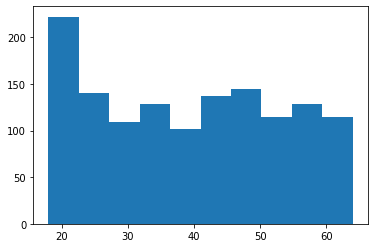

In [ ]:
plt.hist(data['age'])

## Homework

In [ ]:
# create new variables/columns with lambda
data["bmi_categ_lambda"] = data['bmi'].apply(lambda x: "High BMI" if x>=50 and x<=60 else "Medium BMI" if x>=30 and x<50  else "Low BMI")
data.head()

,age,sex,bmi,children,smoker,region,charges,bmi_categ_lambda
0,19,female,27.900,0,yes,southwest,16884.92400,Low BMI
1,18,male,33.770,1,no,southeast,1725.55230,Medium BMI
2,28,male,33.000,3,no,southeast,4449.46200,Medium BMI
3,33,male,22.705,0,no,northwest,21984.47061,Low BMI
4,32,male,28.880,0,no,northwest,3866.85520,Low BMI


In [ ]:
pd.pivot_table(data, values=["bmi"], index=['bmi_categ_lambda'], aggfunc={'bmi':[min, max, np.mean]})

bmi                  
                     max       mean    min
bmi_categ_lambda                          
High BMI          53.130  52.030000  50.38
Low BMI           29.925  25.506426  15.96
Medium BMI        49.060  35.194574  30.00

In [ ]:
# set the bmi_categ_lambda, sex, and region in upper char
data[['sex',"region","bmi_categ_lambda"]] = data.apply(lambda x: x[['sex',"region","bmi_categ_lambda"]].str.upper(), axis = 1)
data.head()

,age,sex,bmi,children,smoker,region,charges,bmi_categ_lambda
0,19,FEMALE,27.900,0,yes,SOUTHWEST,16884.92400,LOW BMI
1,18,MALE,33.770,1,no,SOUTHEAST,1725.55230,MEDIUM BMI
2,28,MALE,33.000,3,no,SOUTHEAST,4449.46200,MEDIUM BMI
3,33,MALE,22.705,0,no,NORTHWEST,21984.47061,LOW BMI
4,32,MALE,28.880,0,no,NORTHWEST,3866.85520,LOW BMI
